# Jove helps teach models of computation using Jupyter 

Included are modules on:

* Sets, strings and languages
* Language operations
* Construction of and operations on DFA and NFA
* Regular expression parsing and automata inter-conversion
* Derivate-based parsing
* Pushdown automata
* The construction of parsers using context-free productions, including
  a full lexer/parser for Jove's own markdown syntax
* Studies of parsing: ambiguity, associativity, precedence
* Turing machines (including one for the Collatz problem)

For a complete Jove top-level reference, kindly refer to https://github.com/ganeshutah/Jove from where you can download and obtain Jove. You can also visit this Github link now and poke around (the NBViewer will display the contents).

Once you are in the top-level Gallery link we provide, feel free to explore the hierarchy of modules found there.

These notebooks should give you an idea of the contents.

* [DFA Illustrations (has a Youtube)](http://nbviewer.jupyter.org/github/ganeshutah/Jove/blob/master/notebooks/tutorial/DFAUnit2.ipynb)

* [Regular Operations](http://nbviewer.jupyter.org/github/ganeshutah/Jove/blob/master/notebooks/driver/Drive_AllRegularOps.ipynb)

* [PDA Operations](http://nbviewer.jupyter.org/github/ganeshutah/Jove/blob/master/notebooks/driver/Drive_PDA_Based_Parsing.ipynb)

* [TM Operations](http://nbviewer.jupyter.org/github/ganeshutah/Jove/blob/master/notebooks/driver/Drive_TM.ipynb)

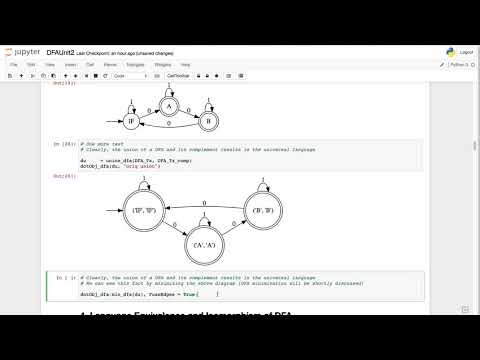

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('dGcLHtYLgDU')

In [2]:
import sys
sys.path[0:0] = ['../..','../../3rdparty'] # Put these at the head of the search path
from jove.DotBashers import *
from jove.Def_DFA import *
from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import *
from jove.Def_md2mc import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accepts_nfa)
help(nfa2dfa)
help(n2d)
help(inSets)
help(rev_dfa)
help(min_dfa_brz)

You may use any of these help commands:
help(re2nfa)

You may use any of these help commands:
help(RE2Str)
help(mk_gnfa)
help(mk_gnfa_from_D)
help(dfa2nfa)
help(del_gn

 # Jove allows you to set problems in markdown and have students solve

1) LOdd1Three0 : Set of strings over {0,1} with an odd # of 1s OR exactly three 0s. 

* Hint on how to arrive at the language:

  - develop NFAs for the two cases and perform their union. Obtain DFA

  - develop REs for the two cases and perform the union. 

  - Testing the creations:

    .   Come up with language for even # of 1s and separately for "other than three 0s". 
 
    .   Do two intersections. 
 
    .   Is the language empty?


2) Language of strings over {0,1} with exactly two occurrences of 0101 in it.

 * Come up with it directly (take overlaps into account, i.e. 010101 has two occurrences in it

 * Come up in another way

Notes:

* Most of the problem students will have in this course is interpreting English (technical English)

* So again, read the writeup at the beginning of Module6 (should be ready soon today) and work on using the tool.





__Solutions__

1) LOdd1Three0 : Set of strings over {0,1} with an odd # of 1s OR exactly three 0s. 

* Hint on how to arrive at the language:

  - develop NFAs for the two cases and perform their union. Obtain DFA

  - develop REs for the two cases and perform the union. 

  - Testing the creations:

    .   Come up with language for even # of 1s and separately for "other than three 0s". 
 
    .   Do two intersections. 
 
    .   Is the language empty?


2) Language of strings over {0,1} with exactly two occurrences of 0101 in it.

 * Come up with it directly (take overlaps into account, i.e. 010101 has two occurrences in it

 * Come up in another way

Notes:

* Most of the problem students will have in this course is interpreting English (technical English)

* So again, read the writeup at the beginning of Module6 (should be ready soon today) and work on using the tool.





Generating LALR tables


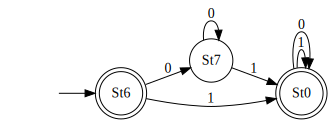

In [3]:
RE_Odd1s  = "(0* 1 0* (1 0* 1 0)*)*"
NFA_Odd1s = re2nfa(RE_Odd1s)
DO_Odd1s  = dotObj_dfa(min_dfa(nfa2dfa(NFA_Odd1s)))
DO_Odd1s

Generating LALR tables


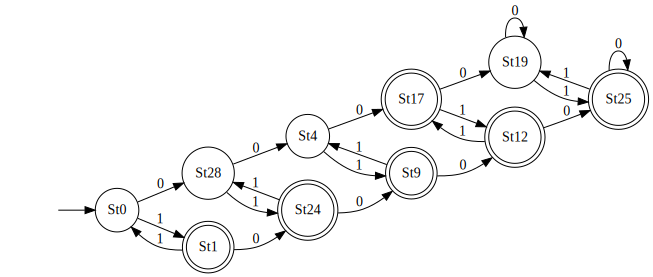

In [4]:
RE_Ex3z = "1* 0 1* 0 1* 0 1* + (0* 1 0* (1 0* 1 0*)*)"
NFA_Ex3z = re2nfa(RE_Ex3z)
DO_Ex3z  = dotObj_dfa(min_dfa(nfa2dfa(NFA_Ex3z)))
DO_Ex3z

# Check out all remaining modules of Jove covering these

* Brzozowski derivatives for parsing
* Brzozowski minimization
* Context-free parsing
* (soon to come) [Binary Decision Diagrams; obtain now from software/ at](http://www.cs.utah.edu/fv)
* (soon to come) Post Correspondence Problem

# Brzozowski's minimization defined

It is nothing but these steps done in this order:

* Reverse
* Determinize
* Reverse
* Determinize

Voila! The machine is now minimal!

In [5]:
# The above example, with min_dfa replaced by the rev;det;rev;det

DofNFA_Ex3z = nfa2dfa(re2nfa("1* 0 1* 0 1* 0 1* + (0* 1 0* (1 0* 1 0*)*)"))
dotObj_dfa(DofNFA_Ex3z)
dotObj_dfa(DofNFA_Ex3z)
minDofNFA_Ex3z = nfa2dfa(rev_dfa(nfa2dfa(rev_dfa(DofNFA_Ex3z))))

Generating LALR tables


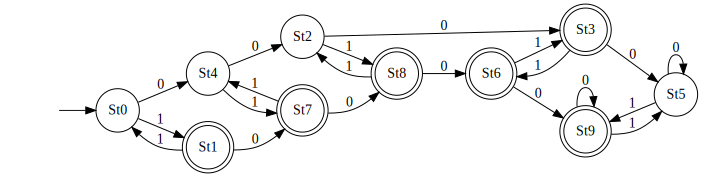

In [6]:
dotObj_dfa(minDofNFA_Ex3z)

# What's the largest postage that can't be made using 3,5 and 7 cents?

Answer is 4. Find it out.

Generating LALR tables


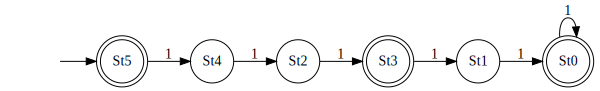

In [7]:
dotObj_dfa(min_dfa_brz(nfa2dfa(re2nfa("(111+11111+1111111)*"))))

# Show ambiguity in parsing

In [8]:
# Parsing an arithmetic expression
pdaEamb = md2mc('''PDA
!!E -> E * E | E + E | ~E | ( E ) | 2 | 3
I : '', #  ; E#  -> M
M : '', E  ; ~E  -> M
M : '', E  ; E+E -> M
M : '', E  ; E*E -> M
M : '', E  ; (E) -> M
M : '', E  ; 2   -> M
M : '', E  ; 3   -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

In [9]:
from jove.Def_PDA       import *

You may use any of these help commands:
help(explore_pda)
help(run_pda)
help(classify_l_id_path)
help(h_run_pda)
help(interpret_w_eps)
help(step_pda)
help(suvivor_id)
help(term_id)
help(final_id)
help(cvt_str_to_sym)
help(is_surv_id)
help(subsumed)
help(is_term_id)
help(is_final_id)



In [10]:
explore_pda("3+2*3+2*3", pdaEamb, STKMAX=7)

String 3+2*3+2*3 accepted by your PDA in 13 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E*E#')
->  ('M', '3+2*3+2*3', 'E*E*E#')
->  ('M', '3+2*3+2*3', 'E+E*E*E#')
->  ('M', '3+2*3+2*3', '3+E*E*E#')
->  ('M', '+2*3+2*3', '+E*E*E#')
->  ('M', '2*3+2*3', 'E*E*E#')
->  ('M', '2*3+2*3', '2*E*E#')
->  ('M', '*3+2*3', '*E*E#')
->  ('M', '3+2*3', 'E*E#')
->  ('M', '3+2*3', 'E+E*E#')
->  ('M', '3+2*3', '3+E*E#')
->  ('M', '+2*3', '+E*E#')
->  ('M', '2*3', 'E*E#')
->  ('M', '2*3', '2*E#')
->  ('M', '*3', '*E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E*E#')
->  ('M', '3+2*3+2*3', 'E+E*E#')
->  ('M', '3+2*3+2*3', '3+E*E#')
->  ('M', '+2*3+2*3', '+E*E#')
->  ('M', '2*3+2*3', 'E*E#')
->  ('M', '2*3+2*3', 'E*E*E#')
-> 

# Show how to disambiguate

In [11]:
# Parsing an arithmetic expression
pdaE = md2mc('''PDA
!!E -> E+T | T
!!T -> T*F | F
!!F -> 2 | 3 | ~F | (E)
I : '', #  ; E#  -> M
M : '', E  ; E+T -> M
M : '', E  ; T   -> M
M : '', T  ; T*F -> M
M : '', T  ; F   -> M
M : '', F  ; 2   -> M
M : '', F  ; 3   -> M
M : '', F  ; ~F  -> M
M : '', F  ; (E) -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

In [12]:
explore_pda("3+2*3+2*3", pdaE, STKMAX=7)

String 3+2*3+2*3 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E+T#')
->  ('M', '3+2*3+2*3', 'E+T+T#')
->  ('M', '3+2*3+2*3', 'T+T+T#')
->  ('M', '3+2*3+2*3', 'F+T+T#')
->  ('M', '3+2*3+2*3', '3+T+T#')
->  ('M', '+2*3+2*3', '+T+T#')
->  ('M', '2*3+2*3', 'T+T#')
->  ('M', '2*3+2*3', 'T*F+T#')
->  ('M', '2*3+2*3', 'F*F+T#')
->  ('M', '2*3+2*3', '2*F+T#')
->  ('M', '*3+2*3', '*F+T#')
->  ('M', '3+2*3', 'F+T#')
->  ('M', '3+2*3', '3+T#')
->  ('M', '+2*3', '+T#')
->  ('M', '2*3', 'T#')
->  ('M', '2*3', 'T*F#')
->  ('M', '2*3', 'F*F#')
->  ('M', '2*3', '2*F#')
->  ('M', '*3', '*F#')
->  ('M', '3', 'F#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .


# And finally, run a Turing Machine with "dynamic tape allocation" :-)

* Why not show how TMs are encoded? 
* This markdown gets parsed to build a TM!
* This TM is for the famous "3x+1" problem (Collatz's Problem)

In [13]:
collatz_tm_str = """
TM

i_start      : 0; ., R -> i_start             !! erase this zero and try to find more
i_start      : 1; 1, R -> goto_lsb            !! we have a proper number, go to the lsb
i_start      : .; ., S -> error               !! error on no input or input == 0


goto_lsb     : 0; 0,R | 1; 1,R -> goto_lsb    !! scan off the right edge of the number
goto_lsb     : .; .,L -> branch               !! take a step back to be on the lsb and start branch


branch       : 0; .,L -> branch               !! number is even, divide by two and re-branch
branch       : 1; 1,L -> check_n_eq_1         !! number is odd, check if it is 1


check_n_eq_1 : 0; 0,R | 1; 1,R -> 01_fma      !! number wasn't 1, goto 3n+1
check_n_eq_1 : .; .,R -> f_halt               !! number was 1, halt


!! carrying 0 we see a 0 so write 0 and carry 0 forward
00_fma       : 0; 0,L -> 00_fma

!! carrying 0 we see a 1 (times 3 is 11) so write 1 and carry 1 forward
00_fma       : 1; 1,L -> 01_fma

!! reached the end of the number, go back to the start
00_fma       : .; .,R -> goto_lsb             


!! carrying 1 we see a 0 so write 1 and carry 0 forward
01_fma       : 0; 1,L -> 00_fma  

!! carrying 1 we see a 1 (times 3 is 11, plus our carry is 100) so write 0 and carry 10 forward
01_fma       : 1; 0,L -> 10_fma  

!! reached the end of the number, write our 1 and go back to the start
01_fma       : .; 1,R -> goto_lsb             


!! carrying 10 we see a 0, so write 0 and carry 1 forward
10_fma       : 0; 0,L -> 01_fma

!! carrying 10 we see a 1 (times 3 is 11, plus our carry is 101), so write 1 and carry 10 forward
10_fma       : 1; 1,L -> 10_fma

!! reached the end of the number, write a 0 from our 10 and carry 1
10_fma       : .; 0,L -> 01_fma

!!"""


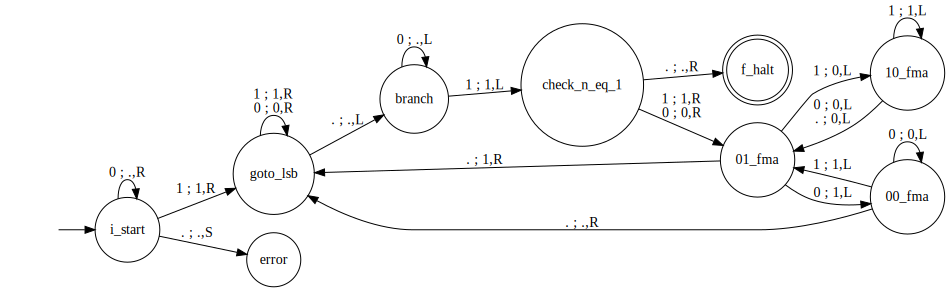

In [14]:
# Now show the above TM graphically!
collatz_tm = md2mc(collatz_tm_str)
dotObj_tm(collatz_tm, FuseEdges=True)

In [15]:
from jove.Def_TM      import *

You may use any of these help commands:
help(step_tm)
help(run_tm)
help(explore_tm)



In [16]:
# Will loop if the Collatz ("3x+1") program will ever loop!
explore_tm(collatz_tm, "0110", 100)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('f_halt', 5, '.....1..............', 65)
 via .. 
 ->('i_start', 0, '0110', 100)
 ->('i_start', 1, '.110', 99)
 ->('goto_lsb', 2, '.110', 98)
 ->('goto_lsb', 3, '.110', 97)
 ->('goto_lsb', 4, '.110', 96)
 ->('branch', 3, '.110........', 95)
 ->('branch', 2, '.11.........', 94)
 ->('check_n_eq_1', 1, '.11.........', 93)
 ->('01_fma', 2, '.11.........', 92)
 ->('10_fma', 1, '.10.........', 91)
 ->('10_fma', 0, '.10.........', 90)
 ->('01_fma', 7, '........010.........', 89)
 ->('goto_lsb', 8, '.......1010.........', 88)
 ->('goto_lsb', 9, '.......1010.........', 87)
 ->('goto_lsb', 10, '.......1010.........', 86)
 ->('goto_lsb', 11, '.......1010.........', 85)
 ->('branch', 10, '.......1010.........', 84)
 ->('branch', 9, '.......101..........', 83)
 ->('check_n_eq_1', 8, '.......101..........', 82)
 ->('01_fma', 9, '.......101..........', 81)
 ->('10_fma', 8, '.

# END: You have a ton more waiting for your execution pleasure!